In [4]:
import time
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import sklearn as skl
import sklearn.model_selection as skl_m
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

%load_ext autoreload
%autoreload 2

import tensorflow_docs as tfdocs
np.set_printoptions(suppress=True)
import tensorflow_docs.plots
import tensorflow_docs.modeling

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#Load in the data
data_un = pd.read_csv('comp_dets/training_data.csv', sep = ',')

In [6]:
object_columns = list(data_un.select_dtypes(include=['object']).columns)
object_columns = object_columns + ['town_mean_altitude', 'town_surface_area', 'population', 'commune_code', 'canton_code', 'city_district_code']

for key in object_columns:
    temp_col = pd.Categorical(data_un[key])
    data_un[key] = temp_col.codes

x_data = data_un.iloc[:,1:35]
y_data = data_un.iloc[:,35]

In [8]:
#normalise data
mean_X = x_data.mean()
std_X = x_data.std()
x_data_n =(x_data-mean_X)/std_X

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data_n, y_data, test_size = 0.3)

In [14]:
metrics = ['accuracy']
loss='mean_absolute_error'
def model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation='tanh', input_shape=[X_train.shape[1]]),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(3, activation='sigmoid'),
        keras.layers.Dense(1, activation='relu')
    ])
    
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
    
    return model

In [15]:
model = model()

In [16]:
def plot_stats(hist, stat):
    plt.plot(hist.history[stat])
    plt.plot(hist.history['val_'+stat])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

In [17]:
model.predict(X_train)

array([[0.547029  ],
       [0.5641962 ],
       [0.70503217],
       ...,
       [0.54893106],
       [0.62816685],
       [0.51143646]], dtype=float32)

In [29]:
EPOCHS = 2

tanh_hist = model.fit(
  X_train, y_train,
  epochs=EPOCHS, batch_size=1,
  callbacks=[tfdocs.modeling.EpochDots()])

Train on 55594 samples
Epoch 1/2
55591/55594 [============================>.] - ETA: 0s - loss: 1394026.0029 - accuracy: 0.0000e+00
Epoch: 0, accuracy:0.0000,  loss:1393951.0127,  
55594/55594 [==============================] - 487s 9ms/sample - loss: 1393951.0127 - accuracy: 0.0000e+00
Epoch 2/2
55594/55594 [==============================] - 521s 9ms/sample - loss: 1392066.2813 - accuracy: 0.0000e+00


KeyError: 'val_loss'

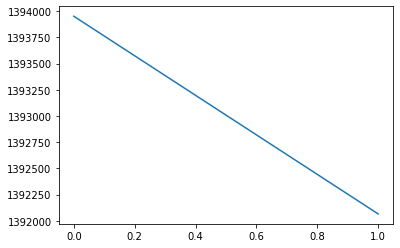

In [30]:
plot_stats(tanh_hist, 'loss')

In [27]:
a = 225
model.predict(X_test).max()

55.593113

In [71]:
y_test.sum()

2685378.36

In [65]:
tanh3_linear_results

[365889.2888682204, 0.00075547723]

In [34]:
ntanh2_relu3_linear_results = model.evaluate(X_test, y_test)

23826/23826 [==============================] - 2s 69us/sample - loss: 356978.6972 - accuracy: 0.0000e+00


In [36]:
ntanh2_relu3_linear_results

[356978.69721102994, 0.0]

In [31]:
model.predict(X_test)[0:40]

array([[26.291279],
       [91.24736 ],
       [26.291279],
       [26.291645],
       [26.292633],
       [88.36953 ],
       [52.062973],
       [91.229675],
       [91.22982 ],
       [56.141617],
       [26.2952  ],
       [27.627602],
       [91.14093 ],
       [91.229805],
       [91.096466],
       [91.223595],
       [91.25456 ],
       [88.49356 ],
       [32.078045],
       [91.229805],
       [91.229706],
       [90.95978 ],
       [91.22985 ],
       [69.851616],
       [51.83511 ],
       [91.2298  ],
       [91.229805],
       [26.292427],
       [26.291279],
       [56.02423 ],
       [82.55186 ],
       [91.2463  ],
       [29.615414],
       [91.22917 ],
       [91.2298  ],
       [48.817787],
       [91.22905 ],
       [91.22909 ],
       [49.355503],
       [31.008562]], dtype=float32)